# Week 6 Mini Project: Are Horror Movies Rated Higher During October Compared to the other 11 Months?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!ls ./movielens/ml-20m

genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


In [3]:
movies = pd.read_csv('./movielens/ml-20m/movies.csv', sep=',')
print(type(movies))
movies.shape
movies.head(5)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('./movielens/ml-20m/ratings.csv',sep=',')
print(type(ratings))
ratings.shape
ratings.head(5)

<class 'pandas.core.frame.DataFrame'>


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [6]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [7]:
is_horror = movies['genres'].str.contains('Horror')
horror_movies = movies[is_horror]
horror_movies.head()

,movieId,title,genres
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
90,92,Mary Reilly (1996),Drama|Horror|Thriller
91,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance


In [8]:
movie_ratings = horror_movies.merge(ratings, on='movieId', how = 'inner')
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp
0,12,Dracula: Dead and Loving It (1995),Comedy|Horror,69,3.0,866811363
1,12,Dracula: Dead and Loving It (1995),Comedy|Horror,116,0.5,1132789459
2,12,Dracula: Dead and Loving It (1995),Comedy|Horror,156,3.0,1039549993
3,12,Dracula: Dead and Loving It (1995),Comedy|Horror,167,3.0,1409584672
4,12,Dracula: Dead and Loving It (1995),Comedy|Horror,184,3.0,840020725


In [9]:
movie_ratings['parsed_time'] = pd.to_datetime(movie_ratings['timestamp'],unit = 's')
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp,parsed_time
0,12,Dracula: Dead and Loving It (1995),Comedy|Horror,69,3.0,866811363,1997-06-20 12:56:03
1,12,Dracula: Dead and Loving It (1995),Comedy|Horror,116,0.5,1132789459,2005-11-23 23:44:19
2,12,Dracula: Dead and Loving It (1995),Comedy|Horror,156,3.0,1039549993,2002-12-10 19:53:13
3,12,Dracula: Dead and Loving It (1995),Comedy|Horror,167,3.0,1409584672,2014-09-01 15:17:52
4,12,Dracula: Dead and Loving It (1995),Comedy|Horror,184,3.0,840020725,1996-08-14 11:05:25


In [10]:
movie_ratings['month'] = movie_ratings.parsed_time.dt.month
movie_ratings.head()

,movieId,title,genres,userId,rating,timestamp,parsed_time,month
0,12,Dracula: Dead and Loving It (1995),Comedy|Horror,69,3.0,866811363,1997-06-20 12:56:03,6
1,12,Dracula: Dead and Loving It (1995),Comedy|Horror,116,0.5,1132789459,2005-11-23 23:44:19,11
2,12,Dracula: Dead and Loving It (1995),Comedy|Horror,156,3.0,1039549993,2002-12-10 19:53:13,12
3,12,Dracula: Dead and Loving It (1995),Comedy|Horror,167,3.0,1409584672,2014-09-01 15:17:52,9
4,12,Dracula: Dead and Loving It (1995),Comedy|Horror,184,3.0,840020725,1996-08-14 11:05:25,8


In [11]:
mean_ratings_per_month = movie_ratings[['month','rating']].groupby('month').mean()
mean_ratings_per_month

,rating
month,
1,3.268816
2,3.256944
3,3.262423
4,3.271912
5,3.290390
6,3.289176
7,3.280280
8,3.265368
9,3.312617


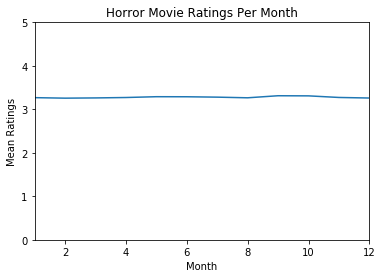

In [12]:

plt.plot(mean_ratings_per_month)
plt.axis([1,12,0,5])
plt.title("Horror Movie Ratings Per Month")
plt.xlabel("Month")
plt.ylabel("Mean Ratings")
plt.show()

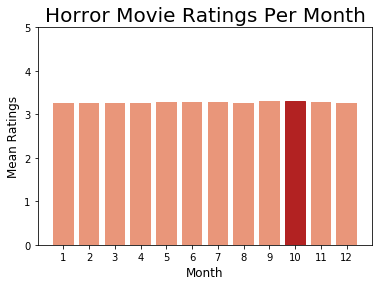

In [13]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
ratings = mean_ratings_per_month.rating.values
barlist = plt.bar(months,ratings,facecolor = "darksalmon")
barlist[9].set_color('firebrick')
plt.xticks(months)
plt.axis([0,13,0,5])
plt.title("Horror Movie Ratings Per Month",fontsize = 20)
plt.xlabel("Month",fontsize = 12)
plt.ylabel("Mean Ratings",fontsize = 12)
plt.show()

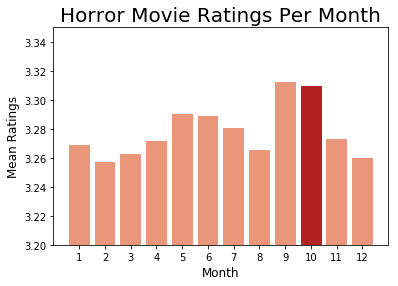

In [14]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
ratings = mean_ratings_per_month.rating.values
barlist_zoomed = plt.bar(months,ratings,facecolor = "darksalmon")
barlist_zoomed[9].set_color('firebrick')
plt.xticks(months)
plt.axis([0,13,3.2,3.35])
plt.title("Horror Movie Ratings Per Month",fontsize = 20)
plt.xlabel("Month",fontsize = 12)
plt.ylabel("Mean Ratings",fontsize = 12)
plt.show()

In [15]:
amt_reviews_per_month = movie_ratings[['month','userId']].groupby('month').count()
amt_reviews_per_month

,userId
month,
1,138632
2,115093
3,133599
4,114094
5,107223
6,113557
7,126429
8,120393
9,97901


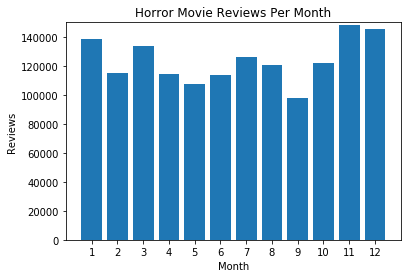

In [16]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
reviews = amt_reviews_per_month.userId.values
plt.bar(months,reviews)
plt.xticks(months)
plt.axis([0,13,0,150000])
plt.title("Horror Movie Reviews Per Month")
plt.xlabel("Month")
plt.ylabel("Reviews")
plt.show()